<h1>Import the Required Libraries</h1>

In [1]:
import string
import re
from numpy import array, argmax, random, take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 200)

<h1> Load the Data </h1>

In [2]:
# function to read raw text file
def read_text(filename):
        # open the file
        file = open(filename, mode='rt', encoding='utf-8')
        
        # read all text
        text = file.read()
        file.close()
        return text

In [3]:
# split a text into sentences
def to_lines(text):
    sents = text.strip().split('\n')
    sents = [i.split('\t') for i in sents]
    return sents

In [4]:
data_germany = read_text("/kaggle/input/bilingual-sentence-pairs/deu.txt")
data_arabic = read_text("/kaggle/input/bilingual-sentence-pairs/ara.txt")
data_italian = read_text("/kaggle/input/bilingual-sentence-pairs/ita.txt")
data_french = read_text("/kaggle/input/bilingual-sentence-pairs/fra.txt")

deu_eng = to_lines(data_germany)
ara_eng = to_lines(data_arabic)
ita_eng = to_lines(data_italian)
fre_eng = to_lines(data_french)

deu_eng = array(deu_eng)
ara_eng = array(ara_eng)
ita_eng = array(ita_eng)
fre_eng = array(fre_eng)

In [5]:
deu_eng = deu_eng[:50000,:]
ita_eng = ita_eng[:50000,:]
fre_eng = fre_eng[:50000,:]

<h1> Text Cleaning / Preprocessing</h1>

In [6]:
# Remove punctuation
deu_eng[:,0] = [s.translate(str.maketrans('', '', string.punctuation)) for s in deu_eng[:,0]]
deu_eng[:,1] = [s.translate(str.maketrans('', '', string.punctuation)) for s in deu_eng[:,1]]
deu_eng

ara_eng[:,0] = [s.translate(str.maketrans('', '', string.punctuation)) for s in ara_eng[:,0]]
ara_eng[:,1] = [s.translate(str.maketrans('', '', string.punctuation)) for s in ara_eng[:,1]]
ara_eng

ita_eng[:,0] = [s.translate(str.maketrans('', '', string.punctuation)) for s in ita_eng[:,0]]
ita_eng[:,1] = [s.translate(str.maketrans('', '', string.punctuation)) for s in ita_eng[:,1]]
ita_eng

fre_eng[:,0] = [s.translate(str.maketrans('', '', string.punctuation)) for s in fre_eng[:,0]]
fre_eng[:,1] = [s.translate(str.maketrans('', '', string.punctuation)) for s in fre_eng[:,1]]
fre_eng


array([['Go', 'Va ',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #1158250 (Wittydev)'],
       ['Go', 'Marche',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8090732 (Micsmithel)'],
       ['Go', 'Bouge ',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #9022935 (Micsmithel)'],
       ...,
       ['Tom liked what he saw', 'Tom a aimé ce quil a vu',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #3729268 (CM) & #5619279 (Aiji)'],
       ['Tom liked what he saw', 'Tom aima ce quil vit',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #3729268 (CM) & #5619280 (Aiji)'],
       ['Tom likes skiing too', 'Tom aussi aime skier',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2869208 (CK) & #5591397 (Aiji)']],
      dtype='<U325')

In [7]:
# convert text to lowercase
for i in range(len(deu_eng)):
    deu_eng[i,0] = deu_eng[i,0].lower()
    deu_eng[i,1] = deu_eng[i,1].lower()
    
for i in range(len(ara_eng)):
    ara_eng[i,0] = ara_eng[i,0].lower()
    ara_eng[i,1] = ara_eng[i,1].lower()
    
for i in range(len(ita_eng)):
    ita_eng[i,0] = ita_eng[i,0].lower()
    ita_eng[i,1] = ita_eng[i,1].lower()
    
for i in range(len(fre_eng)):
    fre_eng[i,0] = fre_eng[i,0].lower()
    fre_eng[i,1] = fre_eng[i,1].lower()
    

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


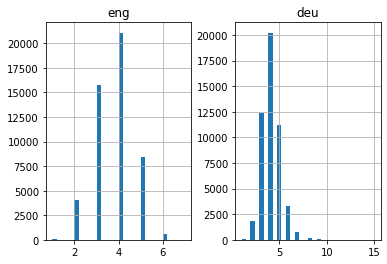

In [8]:
# empty lists
eng_l = []
deu_l = []

# populate the lists with sentence lengths
for i in deu_eng[:,0]:
      eng_l.append(len(i.split()))

for i in deu_eng[:,1]:
      deu_l.append(len(i.split()))

length_df = pd.DataFrame({'eng':eng_l, 'deu':deu_l})

length_df.hist(bins = 30)
plt.show()

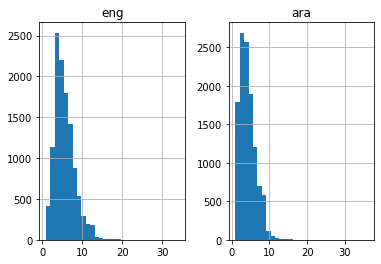

In [9]:
eng_a = []
ara_l = []

# populate the lists with sentence lengths
for i in ara_eng[:,0]:
      eng_a.append(len(i.split()))

for i in ara_eng[:,1]:
      ara_l.append(len(i.split()))

length_df = pd.DataFrame({'eng':eng_a, 'ara':ara_l})

length_df.hist(bins = 30)
plt.show()

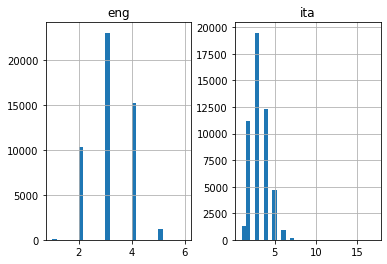

In [10]:
eng_i = []
ita_l = []

# populate the lists with sentence lengths
for i in ita_eng[:,0]:
      eng_i.append(len(i.split()))

for i in ita_eng[:,1]:
      ita_l.append(len(i.split()))

length_df = pd.DataFrame({'eng':eng_i, 'ita':ita_l})

length_df.hist(bins = 30)
plt.show()

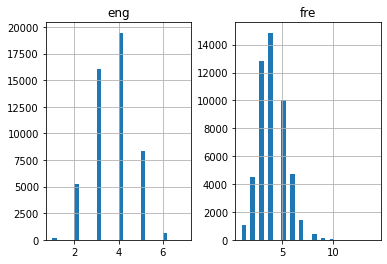

In [11]:
eng_f = []
fre_l = []

# populate the lists with sentence lengths
for i in fre_eng[:,0]:
      eng_f.append(len(i.split()))

for i in fre_eng[:,1]:
      fre_l.append(len(i.split()))

length_df = pd.DataFrame({'eng':eng_f, 'fre':fre_l})

length_df.hist(bins = 30)
plt.show()

In [12]:
# function to build a tokenizer
def tokenization(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [13]:
# prepare english in deutch tokenizer
eng_tokenizer = tokenization(deu_eng[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1

eng_length = 8
print('English in deutch Vocabulary Size: %d' % eng_vocab_size)

English in deutch Vocabulary Size: 6256


In [14]:
# prepare Deutch tokenizer
deu_tokenizer = tokenization(deu_eng[:, 1])
deu_vocab_size = len(deu_tokenizer.word_index) + 1

deu_length = 8
print('Deutch Vocabulary Size: %d' % deu_vocab_size)

Deutch Vocabulary Size: 10329


In [15]:
# prepare English in arabic tokenizer
eng_tokenizer_ara = tokenization(ara_eng[:, 0])
areng_vocab_size = len(eng_tokenizer_ara.word_index) + 1

areng_length = 8
print('English in arabic Vocabulary Size: %d' % areng_vocab_size)

English in arabic Vocabulary Size: 4262


In [16]:
# prepare arabic tokenizer
ara_tokenizer = tokenization(ara_eng[:, 1])
ara_vocab_size = len(ara_tokenizer.word_index) + 1

ara_length = 8
print('arabic Vocabulary Size: %d' % ara_vocab_size)

arabic Vocabulary Size: 12926


In [17]:
# prepare English in french tokenizer
eng_tokenizer_fre = tokenization(fre_eng[:, 0])
freng_vocab_size = len(eng_tokenizer_fre.word_index) + 1

freng_length = 8
print('English in french Vocabulary Size: %d' % freng_vocab_size)

English in french Vocabulary Size: 6042


In [18]:
# prepare french tokenizer
fre_tokenizer = tokenization(fre_eng[:, 1])
fre_vocab_size = len(fre_tokenizer.word_index) + 1

fre_length = 8
print('french Vocabulary Size: %d' % fre_vocab_size)

french Vocabulary Size: 13974


In [19]:
# prepare English in italian tokenizer
eng_tokenizer_ita = tokenization(ita_eng[:, 0])
iteng_vocab_size = len(eng_tokenizer_ita.word_index) + 1

iteng_length = 8
print('English in italian Vocabulary Size: %d' % iteng_vocab_size)

English in italian Vocabulary Size: 4219


In [20]:
# prepare italian tokenizer
ita_tokenizer = tokenization(ita_eng[:, 1])
ita_vocab_size = len(ita_tokenizer.word_index) + 1

ita_length = 8
print('italian Vocabulary Size: %d' % ita_vocab_size)

italian Vocabulary Size: 9706


In [21]:
# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
    seq = tokenizer.texts_to_sequences(lines)
    # pad sequences with 0 values
    seq = pad_sequences(seq, maxlen=length, padding='post')
    return seq

In [22]:
from sklearn.model_selection import train_test_split

# split data into train and test set
train, test = train_test_split(deu_eng, test_size=0.2, random_state = 12)
traina, testa = train_test_split(ara_eng, test_size=0.2, random_state = 12)
trainf, testf = train_test_split(fre_eng, test_size=0.2, random_state = 12)
traini, testi = train_test_split(ita_eng, test_size=0.2, random_state = 12)

In [23]:
# prepare training data
trainY = encode_sequences(deu_tokenizer, deu_length, train[:, 1])
trainX = encode_sequences(eng_tokenizer, eng_length, train[:, 0])

ara_trainY = encode_sequences(ara_tokenizer, ara_length, traina[:, 1])
ara_trainX = encode_sequences(eng_tokenizer_ara, areng_length, traina[:, 0])

fre_trainY = encode_sequences(fre_tokenizer, fre_length, trainf[:, 1])
fre_trainX = encode_sequences(eng_tokenizer_fre, freng_length, trainf[:, 0])

ita_trainY = encode_sequences(ita_tokenizer, ita_length, traini[:, 1])
ita_trainX = encode_sequences(eng_tokenizer_ita, iteng_length, traini[:, 0])


# prepare validation data
testY = encode_sequences(deu_tokenizer, deu_length, test[:, 1])
testX = encode_sequences(eng_tokenizer, eng_length, test[:, 0])

ara_testY = encode_sequences(ara_tokenizer, ara_length, testa[:, 1])
ara_testX = encode_sequences(eng_tokenizer_ara, areng_length, testa[:, 0])

fre_testY = encode_sequences(fre_tokenizer, fre_length, testf[:, 1])
fre_testX = encode_sequences(eng_tokenizer_fre, freng_length, testf[:, 0])

ita_testY = encode_sequences(ita_tokenizer, ita_length, testi[:, 1])
ita_testX = encode_sequences(eng_tokenizer_ita, iteng_length, testi[:, 0])

<h1> Define the Model</h1>

In [24]:
# build NMT model
def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
    model = Sequential()
    model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
    model.add(LSTM(units))
    model.add(RepeatVector(out_timesteps))
    model.add(LSTM(units, return_sequences=True))
    model.add(Dense(out_vocab, activation='softmax'))
    return model

In [25]:
# model compilation
model = define_model(eng_vocab_size, deu_vocab_size, eng_length, deu_length, 512)
modela = define_model(areng_vocab_size, ara_vocab_size, areng_length, ara_length, 512)
modelf = define_model(freng_vocab_size, fre_vocab_size, freng_length, fre_length, 512)
modeli = define_model(iteng_vocab_size, ita_vocab_size, iteng_length, ita_length, 512)

In [26]:
rms = optimizers.RMSprop(lr=0.001)
#RMSprop optimizer as it’s usually a good choice when working with recurrent neural networks
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')
modela.compile(optimizer=rms, loss='sparse_categorical_crossentropy')
modelf.compile(optimizer=rms, loss='sparse_categorical_crossentropy')
modeli.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

<h1> Fit the Model</h1>

In [29]:
filename = 'model.h1.24_jan_19'
#Checkpoint function to save the model with the lowest validation loss
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# train model
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=30, batch_size=512, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)

# Save the model after training
model.save('translation_model.h5')

Epoch 1/30
63/63 [==============================] - 167s 3s/step - loss: 4.8650 - val_loss: 3.2797

Epoch 00001: val_loss improved from inf to 3.27974, saving model to model.h1.24_jan_19
Epoch 2/30
63/63 [==============================] - 161s 3s/step - loss: 3.1618 - val_loss: 3.0961

Epoch 00002: val_loss improved from 3.27974 to 3.09605, saving model to model.h1.24_jan_19
Epoch 3/30
63/63 [==============================] - 161s 3s/step - loss: 2.9564 - val_loss: 2.9142

Epoch 00003: val_loss improved from 3.09605 to 2.91419, saving model to model.h1.24_jan_19
Epoch 4/30
63/63 [==============================] - 160s 3s/step - loss: 2.7633 - val_loss: 2.8265

Epoch 00004: val_loss improved from 2.91419 to 2.82649, saving model to model.h1.24_jan_19
Epoch 5/30
63/63 [==============================] - 160s 3s/step - loss: 2.6298 - val_loss: 2.6907

Epoch 00005: val_loss improved from 2.82649 to 2.69067, saving model to model.h1.24_jan_19
Epoch 6/30
63/63 [==============================]

In [30]:
filename = 'modela.h1.24_jan_19'
checkpointa = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# train model
historya = modela.fit(ara_trainX, ara_trainY.reshape(ara_trainY.shape[0], ara_trainY.shape[1], 1),
                    epochs=30, batch_size=512, validation_split = 0.2,callbacks=[checkpointa], 
                    verbose=1)

# Save the model after training
modela.save('translation_modela.h5')

Epoch 1/30
15/15 [==============================] - 55s 3s/step - loss: 7.2549 - val_loss: 4.8307

Epoch 00001: val_loss improved from inf to 4.83072, saving model to modela.h1.24_jan_19
Epoch 2/30
15/15 [==============================] - 46s 3s/step - loss: 4.6328 - val_loss: 4.7281

Epoch 00002: val_loss improved from 4.83072 to 4.72814, saving model to modela.h1.24_jan_19
Epoch 3/30
15/15 [==============================] - 45s 3s/step - loss: 4.4708 - val_loss: 4.7569

Epoch 00003: val_loss did not improve from 4.72814
Epoch 4/30
15/15 [==============================] - 46s 3s/step - loss: 4.3616 - val_loss: 4.7666

Epoch 00004: val_loss did not improve from 4.72814
Epoch 5/30
15/15 [==============================] - 45s 3s/step - loss: 4.2852 - val_loss: 4.8863

Epoch 00005: val_loss did not improve from 4.72814
Epoch 6/30
15/15 [==============================] - 44s 3s/step - loss: 4.2386 - val_loss: 4.7884

Epoch 00006: val_loss did not improve from 4.72814
Epoch 7/30
15/15 [====

In [31]:
filename = 'modelf.h1.24_jan_19'
checkpointf = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# train model
historyf = modelf.fit(fre_trainX, fre_trainY.reshape(fre_trainY.shape[0], fre_trainY.shape[1], 1),
                    epochs=30, batch_size=512, validation_split = 0.2,callbacks=[checkpointf], 
                    verbose=1)

# Save the model after training
modelf.save('translation_modelf.h5')

Epoch 1/30
63/63 [==============================] - 223s 3s/step - loss: 5.0955 - val_loss: 3.4923

Epoch 00001: val_loss improved from inf to 3.49228, saving model to modelf.h1.24_jan_19
Epoch 2/30
63/63 [==============================] - 208s 3s/step - loss: 3.3889 - val_loss: 3.4056

Epoch 00002: val_loss improved from 3.49228 to 3.40564, saving model to modelf.h1.24_jan_19
Epoch 3/30
63/63 [==============================] - 200s 3s/step - loss: 3.2484 - val_loss: 3.2606

Epoch 00003: val_loss improved from 3.40564 to 3.26062, saving model to modelf.h1.24_jan_19
Epoch 4/30
63/63 [==============================] - 198s 3s/step - loss: 3.0888 - val_loss: 3.1078

Epoch 00004: val_loss improved from 3.26062 to 3.10784, saving model to modelf.h1.24_jan_19
Epoch 5/30
63/63 [==============================] - 198s 3s/step - loss: 2.9030 - val_loss: 2.9761

Epoch 00005: val_loss improved from 3.10784 to 2.97613, saving model to modelf.h1.24_jan_19
Epoch 6/30
63/63 [==========================

In [32]:
filename = 'modeli.h1.24_jan_19'
checkpointi = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# train model
historyi = modeli.fit(ita_trainX, ita_trainY.reshape(ita_trainY.shape[0], ita_trainY.shape[1], 1),
                    epochs=30, batch_size=512, validation_split = 0.2,callbacks=[checkpointi], 
                    verbose=1)

# Save the model after training
modeli.save('translation_modeli.h5')

Epoch 1/30
63/63 [==============================] - 162s 2s/step - loss: 4.3557 - val_loss: 2.7403

Epoch 00001: val_loss improved from inf to 2.74030, saving model to modeli.h1.24_jan_19
Epoch 2/30
63/63 [==============================] - 155s 2s/step - loss: 2.6697 - val_loss: 2.6571

Epoch 00002: val_loss improved from 2.74030 to 2.65710, saving model to modeli.h1.24_jan_19
Epoch 3/30
63/63 [==============================] - 155s 2s/step - loss: 2.5303 - val_loss: 2.4746

Epoch 00003: val_loss improved from 2.65710 to 2.47461, saving model to modeli.h1.24_jan_19
Epoch 4/30
63/63 [==============================] - 155s 2s/step - loss: 2.3420 - val_loss: 2.3296

Epoch 00004: val_loss improved from 2.47461 to 2.32959, saving model to modeli.h1.24_jan_19
Epoch 5/30
63/63 [==============================] - 155s 2s/step - loss: 2.1849 - val_loss: 2.2398

Epoch 00005: val_loss improved from 2.32959 to 2.23979, saving model to modeli.h1.24_jan_19
Epoch 6/30
63/63 [==========================

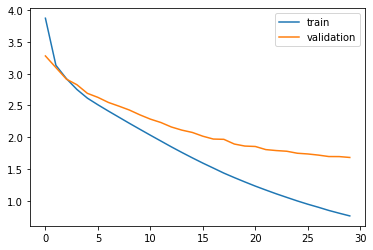

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

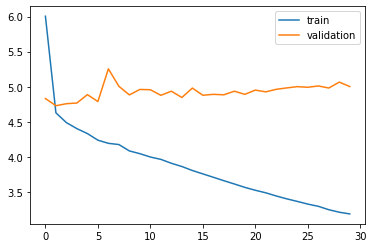

In [34]:
plt.plot(historya.history['loss'])
plt.plot(historya.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

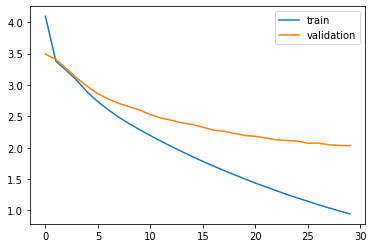

In [35]:
plt.plot(historyf.history['loss'])
plt.plot(historyf.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

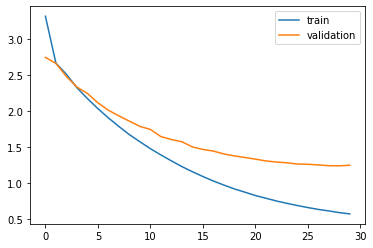

In [36]:
plt.plot(historyi.history['loss'])
plt.plot(historyi.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [27]:
from keras.models import load_model

# Load the saved model
model = load_model('translation_model.h5')

In [28]:
# Load the saved model
modela = load_model('translation_modela.h5')

In [29]:
# Load the saved model
modelf = load_model('translation_modelf.h5')

In [30]:
# Load the saved model
modeli = load_model('translation_modeli.h5')

<h1> Prediction on unseen data</h1>

In [31]:
import numpy as np

preds = np.argmax(model.predict(testX.reshape((testX.shape[0], testX.shape[1], 1))), axis=-1)
preda = np.argmax(modela.predict(ara_testX.reshape((ara_testX.shape[0],ara_testX.shape[1]))), axis=-1)
predf = np.argmax(modelf.predict(fre_testX.reshape((fre_testX.shape[0],fre_testX.shape[1]))), axis=-1)
predi = np.argmax(modeli.predict(ita_testX.reshape((ita_testX.shape[0],ita_testX.shape[1]))), axis=-1)

In [32]:
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

In [33]:
preds_text = []
for i in preds:
    temp = []
    for j in range(len(i)):
        t = get_word(i[j], deu_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], deu_tokenizer)) or (t == None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t) 

    preds_text.append(' '.join(temp))

In [34]:
preda_text = []
for i in preda:
    temp = []
    for j in range(len(i)):
        t = get_word(i[j], ara_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], ara_tokenizer)) or (t == None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t) 

    preda_text.append(' '.join(temp))

In [35]:
predf_text = []
for i in predf:
    temp = []
    for j in range(len(i)):
        t = get_word(i[j], fre_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], fre_tokenizer)) or (t == None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t) 

    predf_text.append(' '.join(temp))

In [36]:
predi_text = []
for i in predi:
    temp = []
    for j in range(len(i)):
        t = get_word(i[j], ita_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], ita_tokenizer)) or (t == None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t) 

    predi_text.append(' '.join(temp))

In [37]:
pred_df = pd.DataFrame({'actual' : test[:,1], 'predicted' : preds_text})

# print 15 rows randomly
pred_df.head(15)

,actual,predicted
0,das weiß ich bereits,ich weiß ich schon
1,wer ist sie,wer hat sie
2,habt ihr’s,haben sie es
3,machen sie von ihren füßen gebrauch,ziehen deine ihre
4,da lag der hase im pfeffer,das war das botschaft
5,er legte seine jacke ab,er zog seinen mantel aus
6,tom besuchte die sehenswürdigkeiten,tom klapperte sehenswürdigkeiten
7,ich habe die schuhe anprobiert,ich habe die den
8,öffne die türen dort,öffne sie die
9,ich muss tom helfen,ich muss tom helfen


In [38]:
preda_df = pd.DataFrame({'actual' : testa[:,1], 'predicted' : preda_text})

# print 15 rows randomly
preda_df.head(15)

,actual,predicted
0,أحتاجك,أنا
1,لم لا نقوم بذلك؟,لا أن
2,انتظرتك لساعتين,اشترت الخطبة في
3,لا يمكنني السماح لك بفعل ذلك,لا أن
4,إنك بأيدي أمينة الآن,هل إلى في من
5,أخبرنا أن كنت لا تريد أن تأتي,هل أن
6,أحسن التصرف,كُن
7,أختي تشبه جدتي,لقد في
8,بيكاسو رسام مشهور,لقد في
9,إنّها مفاجأة,إنها جميلة


In [39]:
predf_df = pd.DataFrame({'actual' : testf[:,1], 'predicted' : predf_text})

# print 15 rows randomly
predf_df.head(15)

,actual,predicted
0,je suis contente de lentendre,je suis réjouis dentendre lentendre
1,cest mort,il est
2,ne tarrête pas de grimper,continuez à pas
3,je vous respecte,je tai méprise
4,quest ce que tu as fait ensuite,quavezvous fait
5,je vous donnerai un indice,je vais te un serviette
6,sontelles déjà arrivées,sommesnous déjà arrivés
7,elle sait tout,elle sait tenté
8,jespère que cest vrai,jespère que vrai
9,ils mont dépouillée,ils mont dépouillé


In [40]:
predi_df = pd.DataFrame({'actual' : testi[:,1], 'predicted' : predi_text})

# print 15 rows randomly
predi_df.head(15)

,actual,predicted
0,lui è in pigiama,è in pigiama
1,stai tranquillo,state calmi
2,prendi il libro,prendete il libro
3,sei pigro,lei sei
4,è svergognato,è svergognata
5,tom è molto magro,tom è molto magro
6,lui venne di persona,lui è in di
7,abbiamo vinto la partita,abbiamo vinto lincontro
8,la cena è pronta,faccia sono
9,dovè la mia palla,dovè la mia


In [41]:
def calculate_accuracy(model, testX, testY):
    preds = np.argmax(model.predict(testX.reshape((testX.shape[0], testX.shape[1], 1))), axis=-1)
    correct_predictions = np.sum(preds == testY.reshape(testY.shape[0], testY.shape[1]))
    total_predictions = testY.size
    accuracy = correct_predictions / total_predictions
    return accuracy

# Calculate accuracy for each model
accuracy_german = calculate_accuracy(model, testX, testY)
accuracy_arabic = calculate_accuracy(modela, ara_testX, ara_testY)
accuracy_french = calculate_accuracy(modelf, fre_testX, fre_testY)
accuracy_italian = calculate_accuracy(modeli, ita_testX, ita_testY)

print("Accuracy of German translation model:", accuracy_german)
print("Accuracy of Arabic translation model:", accuracy_arabic)
print("Accuracy of French translation model:", accuracy_french)
print("Accuracy of Italian translation model:", accuracy_italian)


Accuracy of German translation model: 0.7319
Accuracy of Arabic translation model: 0.4855934018851757
Accuracy of French translation model: 0.6817875
Accuracy of Italian translation model: 0.7197875


In [42]:
def translate_sentence(sentence, target_language):
    if target_language == 'arabic':
        tokenizer = eng_tokenizer_ara
        modell = modela
        max_length = areng_length
        target_tokenizer = ara_tokenizer
    elif target_language == 'french':
        tokenizer = eng_tokenizer_fre
        modell = modelf
        max_length = freng_length
        target_tokenizer = fre_tokenizer
    elif target_language == 'german':
        tokenizer = eng_tokenizer
        modell = model
        max_length = eng_length
        target_tokenizer = deu_tokenizer
    elif target_language == 'italian':
        tokenizer = eng_tokenizer_ita
        modell = modeli
        max_length = iteng_length
        target_tokenizer = ita_tokenizer
    else:
        return "Target language not supported."
    
    # Tokenize input sentence
    sentence = sentence.lower()
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence)
    sentence = sentence.strip()
    tokens = tokenizer.texts_to_sequences([sentence])
    
    # Pad tokenized sequence
    padded_sequence = pad_sequences(tokens, maxlen=max_length, padding='post')
    
    # Predict the translated sequence
    prediction = modell.predict(padded_sequence)
    
    # Decode the predicted sequence into text
    decoded_sentence = ''
    for token in prediction[0]:
        sampled_token_index = np.argmax(token)
        sampled_word = get_word(sampled_token_index, target_tokenizer)
        if sampled_word is None:
            break
        decoded_sentence += sampled_word + ' '
    
    return decoded_sentence.strip()


In [47]:
english_sentence = "I love you"
translated_arabic = translate_sentence(english_sentence, 'arabic')
translated_french = translate_sentence(english_sentence, 'french')
translated_german = translate_sentence(english_sentence, 'german')
translated_italian = translate_sentence(english_sentence, 'italian')

print("Arabic translation:", translated_arabic)
print("French translation:", translated_french)
print("German translation:", translated_german)
print("Italian translation:", translated_italian)

#Hello
#I am ok
#How are you

Arabic translation: أنا
French translation: je taime
German translation: ich liebe dich
Italian translation: io amo
